## Outlier detection using zscore

In [136]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [137]:
import warnings
warnings.filterwarnings('ignore')

In [138]:
# load data
df = pd.read_csv('1_bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [139]:
df.shape

(13200, 7)

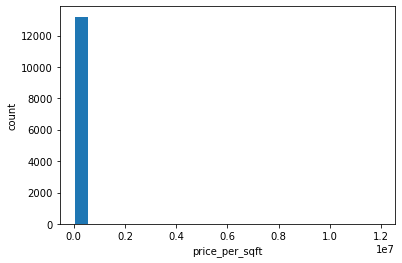

In [140]:
# for simplicity, examine outliers only in price_per_sqft

# histogram
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

_above graph shows that there are some higher price_per_sqft values. but it's not shown as height is very small than the first bar_

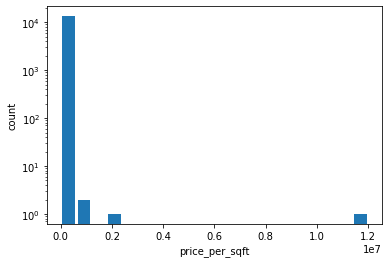

In [141]:
# scaling y axis
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.yscale('log')
plt.show()

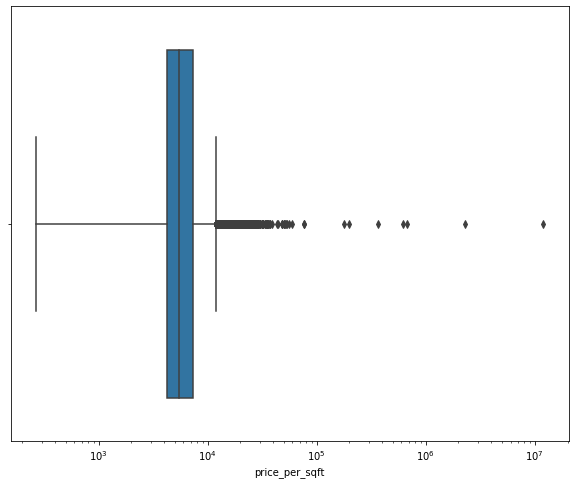

In [142]:
from matplotlib.pyplot import figure
figure(figsize=(10,8))

# boxplot
sn.boxplot(df.price_per_sqft)
plt.xscale('log')

## First use percentile 

In [143]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [144]:
outleirs = df[(df.price_per_sqft < lower_limit) | (df.price_per_sqft > upper_limit)]
outleirs.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7012,other,1 BHK,650.0,1.0,500.0,1,76923
345,other,3 Bedroom,11.0,3.0,74.0,3,672727


In [145]:
outleirs.shape

(28, 7)

In [146]:
df_filtered = df[(df.price_per_sqft > lower_limit) & (df.price_per_sqft < upper_limit)]
df_filtered.shape

(13172, 7)

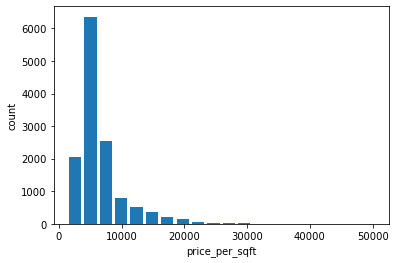

In [147]:
plt.hist(df_filtered.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

_Still we can see some oultliers , Then..._

### Approach 1 -  using 4 standard deviation

In [148]:
lower_limit = df_filtered.price_per_sqft.mean() - 4*df_filtered.price_per_sqft.std()
upper_limit = df_filtered.price_per_sqft.mean() + 4*df_filtered.price_per_sqft.std()
lower_limit, upper_limit

(-9900.429065502549, 23227.73653589429)

In [149]:
outlier_1 = df_filtered[(df_filtered.price_per_sqft < lower_limit) | (df_filtered.price_per_sqft > upper_limit)]
outlier_1.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,50349
6744,HAL 2nd Stage,2 Bedroom,600.0,3.0,145.0,2,24166
4350,other,5 Bedroom,1750.0,5.0,450.0,5,25714
6597,other,2 BHK,1030.0,2.0,300.0,2,29126
3873,other,5 Bedroom,1250.0,5.0,300.0,5,24000


In [150]:
outlier_1.shape

(125, 7)

In [151]:
df1 = df_filtered[(df_filtered.price_per_sqft > lower_limit) & (df_filtered.price_per_sqft < upper_limit)]
df1.shape

(13047, 7)

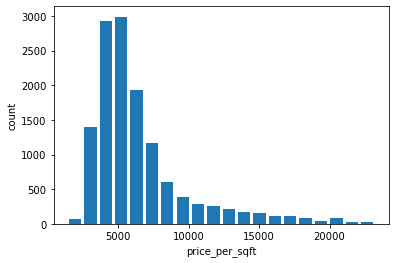

In [152]:
plt.hist(df1.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

### Approach 2 - using z score / 4 as limit

_exactly same thing happens as above approach_

z = (x - miu)/ sigma   

In [153]:
df2 = df_filtered.copy()
df2['zscore_price_per_sqft'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore_price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [154]:
outlier_2 = df2[(df2.zscore_price_per_sqft < -4) | (df2.zscore_price_per_sqft >4)]
outlier_2.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore_price_per_sqft
12631,Rajaji Nagar,5 Bedroom,2500.0,4.0,650.0,5,26000,4.669464
9711,Rajaji Nagar,2 Bedroom,1056.0,1.0,250.0,2,23674,4.107767
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
12636,OMBR Layout,5 Bedroom,600.0,3.0,140.0,5,23333,4.025420
8157,other,4 BHK,2230.0,4.0,792.0,4,35515,6.967206


In [155]:
outlier_2.shape

(125, 8)

In [157]:
df2 = df2[(df2.zscore_price_per_sqft > -4) & (df2.zscore_price_per_sqft < 4)]
df2.shape

(13047, 8)

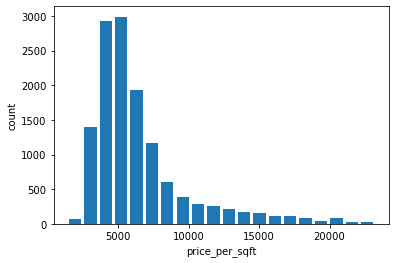

In [158]:
plt.hist(df2.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

##### zscore func

In [159]:
from scipy import stats

# zscore values of price_per_sqft
z = stats.zscore(df_filtered.price_per_sqft)

In [160]:
z

array([-0.71595061, -0.49474071, -0.56960432, ..., -0.33945908,
        0.90400137, -0.86302138])

In [161]:
df3 = df_filtered.copy()
df3['zscore_price_per_sqft'] = z

In [162]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore_price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715951
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494741
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569604
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101103
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582887


In [163]:
df3[(df3.zscore_price_per_sqft > -4) & (df3.zscore_price_per_sqft < 4)].shape  # after removing outliers

(13047, 8)